In [ ]:
import numpy as np
import tensorflow as tf
import tensorflow_datasets as  tfds
from tensorflow import keras

In [ ]:
from keras.datasets import mnist

In [ ]:
'''
7 faz

zad 1) 
# A: prosty eksperyment z danymi MNIST (rozpoznawanie recznie pisanych cyfr) przy uzyciu sieci neuronowej, wg 7 faz cyklu przetwarzania danych:
# 1) cel: zbudowanie sieci neuronowej klasyfikujacej recznie pisane cyfry do klas (0-1)
#  a) dane: zbiór MNIST, ewaluacja: accuracy (osiagnac przynajmniej 95% dokladnosci)
# 2) dane: sciagniecie danych MNIST
# 3) wstepna ocena danych: obejrzenie danych: ile, jaki format, jakie atrybuty, balans klas
# 4) wstepne przetwarzanie danych: przeskalowanie atrybutów, splaszczenie tensora do wektora, podzial train/test
# 5) modelowanie: 1 warstwa (lokalna), 2 warstwy, rozne ustawienia liczby epok
# 6) ewaluacja: (tym razem bardzo uproszczona) accuracy na testowym 
# 7) podsumowanie, wnioski

'''

'\n7 faz\n\nzad 1) \n# A: prosty eksperyment z danymi MNIST (rozpoznawanie recznie pisanych cyfr) przy uzyciu sieci neuronowej, wg 7 faz cyklu przetwarzania danych:\n# 1) cel: zbudowanie sieci neuronowej klasyfikujacej recznie pisane cyfry do klas (0-1)\n#  a) dane: zbiór MNIST, ewaluacja: accuracy (osiagnac przynajmniej 95% dokladnosci)\n# 2) dane: sciagniecie danych MNIST\n# 3) wstepna ocena danych: obejrzenie danych: ile, jaki format, jakie atrybuty, balans klas\n# 4) wstepne przetwarzanie danych: przeskalowanie atrybutów, splaszczenie tensora do wektora, podzial train/test\n# 5) modelowanie: 1 warstwa (lokalna), 2 warstwy, rozne ustawienia liczby epok\n# 6) ewaluacja: (tym razem bardzo uproszczona) accuracy na testowym \n# 7) podsumowanie, wnioski\n\n'

In [ ]:
'''
(ds_train, ds_test)  = tfds.load(
    'mnist',
    split=['train', 'test'],
    shuffle_files = True,
    as_supervised=True
)
'''

"\n(ds_train, ds_test)  = tfds.load(\n    'mnist',\n    split=['train', 'test'],\n    shuffle_files = True,\n    as_supervised=True\n)\n"

In [ ]:
#ctrl + space - podpowiada
#print(mnist.load_data.__docs__)

In [ ]:
(train_images, train_labels), (test_images, test_labels)= mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [ ]:
def showImages(image):
  for i in range(image.shape[0]):
    for j in range(image.shape[1]):
      print(f"{image}")



In [ ]:
train_labels[0]

5

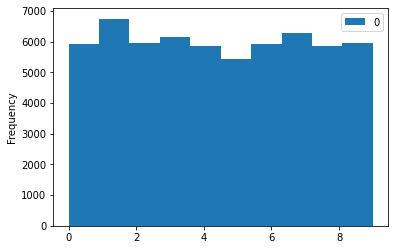

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

trlabels = pd.DataFrame(train_labels)
trlabels.plot.hist()

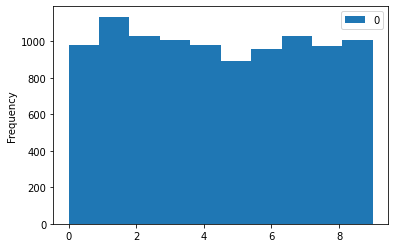

In [ ]:
telabels = pd.DataFrame(test_labels)
telabels.plot.hist()

In [ ]:
# faza 4
# splaszczanie tensora

train_flat = train_images.reshape((60000, 28*28))

test_flat = test_images.reshape((10000, 28*28))

train = train_flat.astype("float32") / 255
test = test_flat.astype("float32") / 255
train[0].shape

(784,)

spars cross entropy 3 = [0 0 0 0 1 0 0 0 0 0 0 0 0] zamiast one hot encoding


In [ ]:
# faza 5 
from tensorflow.keras import layers# na pocz. model 1-warstwowy

model1 = keras.Sequential(layers.Dense(10, activation = 'softmax'))

model1.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ["accuracy"])
model1.fit(train, train_labels, epochs =3)

Epoch 1/3
1875/1875 [==============================] - 6s 2ms/step - loss: 0.4390 - accuracy: 0.8817
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3029 - accuracy: 0.9154
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2893 - accuracy: 0.9207


In [ ]:
#dalej dotrenowuje tak naprawde
model1.fit(train, train_labels, epochs =3)

Epoch 1/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2842 - accuracy: 0.9229
Epoch 2/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2814 - accuracy: 0.9251
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2802 - accuracy: 0.9260


In [ ]:
model1.evaluate(test, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.2848 - accuracy: 0.9256


[0.2847628593444824, 0.925599992275238]

In [ ]:
model2 = keras.Sequential([layers.Dense(512, activation = 'relu'), layers.Dense(10, activation = 'softmax')]) 
model2.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', metrics = ["accuracy"])
model2.fit(train, train_labels, epochs = 10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2010 - accuracy: 0.9400
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0892 - accuracy: 0.9743
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0655 - accuracy: 0.9816
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0496 - accuracy: 0.9863
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0393 - accuracy: 0.9890
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0328 - accuracy: 0.9914
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0288 - accuracy: 0.9923
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0220 - accuracy: 0.9942
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0186 - accuracy: 0.9951
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.015

In [ ]:
#blad zmiejszony 3 krotnie dla 2 opok
model2.evaluate(test, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.1062 - accuracy: 0.9808


[0.10619582235813141, 0.9807999730110168]